# N - Puzzle Problem Solver 

In [23]:
# ref - https://www.geeksforgeeks.org/a-search-algorithm/
class Board:
    
    def __init__(self,current_state=[],parent_state=None,cost_from_initial_state = 0, cost_to_goal_state=0):
        self.current_state = current_state
        self.parent_state = parent_state
        self.child_states = [] # contains list of child states
        self.cost_from_initial_state = cost_from_initial_state # g value, also represents the depth of the tree
        self.cost_to_goal_state = cost_to_goal_state # h value
        self.length = len(current_state)
        
    # ref - https://www.geeksforgeeks.org/python-__lt__-magic-method/
    # for comparing the nodes, heapq used < operator, so we need to add that operator for comparing  nodes
    # here, in heapq, for our algorithm, we need to comapare f(n) = g(n) + h(n) value
    def __lt__(self,node):
        return (self.cost_from_initial_state + self.cost_to_goal_state) < (node.cost_from_initial_state + node.cost_to_goal_state)

    # prints the path that has the nodes traversed from initial node to come to current node
    def print_path(self):
        states_travelled = []
        count = 0
        curr = self
        while curr:
            states_travelled.append(curr)
            count+=1
            curr=curr.parent_state
        print("Path Travelled to arrive to solution:")
        for state in states_travelled[::-1]:
            state.print_state()
            print()
        print("Number of nodes in the path:",count)
        return 

    def print_state(self):
        for i in range(self.length):
            for j in range(self.length):
                print(self.current_state[i][j],end=" ")
            print()
        return

    def add_child_state(self, child_state, cost_to_add=1): # default cost to add is 1
        self.child_states.append(child_state)
        child_state.parent_state = self
        child_state.cost_from_initial_state=self.cost_from_initial_state + cost_to_add
        
    def is_state_values_equal(self, state):
        # check lengths
        if len(self.current_state)==len(state) and len(self.current_state[0])==len(state[0]):
            for i in range(len(state)):
                for j in range(len(state[0])):
                    if self.current_state[i][j]!=state[i][j]:
                        return False
        else:
            return False
        return True
                    

        
    # all possible child states from current state (by moving the tiles around the empty tile)
    def get_child_states(self):
        result = []
        # find the position of empty tile (tile with zero)
        empty_tile_position = None
        for i in range(self.length):
            for j in range(self.length):
                if self.current_state[i][j]==0:
                    empty_tile_position = (i,j)
                    break
            if empty_tile_position: # break outer for loop if found
                break

        # finding if the move is valid (within the range)
        def is_valid(pos):
            return pos[0]>=0 and pos[0]<self.length and pos[1]>=0 and pos[1]<self.length

        # move the empty tile to other possible positions
        possible_movements = [(0,1),(1,0),(0,-1),(-1,0)]

        for move in possible_movements:
            new_empty_tile_position = empty_tile_position[0]+move[0], empty_tile_position[1]+move[1]
            if is_valid(new_empty_tile_position):
                new_board_state = [row[:] for row in self.current_state]
                # swap the values from empty tile position and new empty tile position 
                a,b = empty_tile_position
                x,y = new_empty_tile_position
                new_board_state[a][b], new_board_state[x][y] = new_board_state[x][y], new_board_state[a][b]

                # if current state is not equal to parent state
                if not self.is_state_values_equal(new_board_state): 
                    result.append(new_board_state)
                    
        return result             

## Distance Calculation Functions

In [2]:
def calculate_misplaced_tile_heuristic(state, goal):
    # calcualte number of tiles that are not same, 0 is not counted
    res = 0
    for i in range(len(state)):
        for j in range(len(state[0])):
            if state[i][j]!=0 and state[i][j]!=goal[i][j]:
                res+=1
    return res

In [3]:
def calculate_manhattan_disance_heuristic(state, goal):
    res = 0
    length = len(state)
    # keep track of position of each element in goal state
    goal_state_positions = dict()
    for i in range(length):
        for j in range(length):
            goal_state_positions[goal[i][j]] = i,j

    for i in range(length):
        for j in range(length):
            if state[i][j]!=0:
                a,b = goal_state_positions[state[i][j]]
                res+=abs(i-a) + abs(j-b)
    return res

## Utility Fucntions

In [4]:
# ref - https://stackoverflow.com/questions/52728944/how-can-i-convert-a-2d-array-into-a-tuple-in-python-3
def list_to_tuple(array):
    return tuple(map(tuple, array))

In [5]:
def print_2d_array(state):
    for i in range(len(state)):
        for j in range(len(state)):
            print(state[i][j], end=" ")
        print()

## Generic Search Function

In [24]:
from heapq import heappush, heappop

# here queueing function can be
# uniform cost search or 
# A* with misplaced tile or 
# A* with manhattan distance 

def general_search(initial_state, goal_state, queueing_function, print_solution_path = False): 

    board_root = Board(current_state = initial_state) # MAKE_NODE(problem.INITIAL_STATE)
    nodes = []
    heappush(nodes, board_root)
    visited_nodes = set() # set because lookup is faster
    max_num_of_nodes = 1  # to keep track of maximum number of nodes in the queue during search process
    nodes_with_child_nodes = 0 

    # while NODES is not EMPTY
    while nodes:
        max_num_of_nodes = max(len(nodes),max_num_of_nodes)
        node = heappop(nodes)

        # to debug the explored nodes
        # print("Exploring the node:")
        # node.print_state()
        
        # checking if node.STATE = problem GOAL STATE
        if node.is_state_values_equal(goal_state):
            print("Solution found")
            print("Number of nodes expanded for child nodes:",nodes_with_child_nodes)
            print("Maximum number of nodes in queue:",max_num_of_nodes)
            print("Depth of the solution:",node.cost_from_initial_state)

            if print_solution_path:
                node.print_path()
            return nodes_with_child_nodes, max_num_of_nodes, node.cost_from_initial_state

        # if current state is not GOAL state, find its child states and add it to queue
        # QUEUEING_FUNCTION(nodes, EXPAND( node, OPERATORS))
        else:
            # print("current state not equal to goal")
            
            # add node to visited set
            # as 2d list is unhashable, we need to convert to tuple and add it
            visited_nodes.add(list_to_tuple(node.current_state)) 

            # find its child states
            child_nodes = node.get_child_states()

        if not len(child_nodes):
            continue

        for child_node in child_nodes:
            current_node = Board(current_state = child_node)
            
            if list_to_tuple(current_node.current_state) in visited_nodes:
                continue

            if queueing_function == "Uniform Cost search":
                current_node.cost_to_goal_state = 0 # h value = 0
                
            elif queueing_function == "A* with misplaced tile heuristic":
                # calculate h value
                current_node.cost_to_goal_state = calculate_misplaced_tile_heuristic(current_node.current_state,goal_state) 

            elif queueing_function == "A* with manhattan distance heuristic":
                # calculate h value
                current_node.cost_to_goal_state = calculate_manhattan_disance_heuristic(current_node.current_state,goal_state)

            node.add_child_state(current_node)
            
            heappush(nodes,current_node) # adding to QUEUEING_FUNCTION
            
        nodes_with_child_nodes+=1
        
    print("No solution Found")
    return None
    

## Driver Code

In [7]:
# key: depth of the tree, value: board values
# referred from CS205 Project1 Description - https://www.dropbox.com/scl/fi/ntcwot5x8zihrtqot0ysi/Project_1_The_Eight_Puzzle_CS_205_2024.pdf?rlkey=wvosnvls0lkgpiv7h5xsoicz8&dl=0
default_8_puzzles = {
    0: [[1,2,3],[4,5,6],[7,8,0]],
    1: [[1,2,3],[4,5,6],[0,7,8]],
    4: [[1,2,3],[5,0,6],[4,7,8]],
    8: [[1,3,6],[5,0,2],[4,7,8]],
    12:[[1,3,6],[5,0,7],[4,8,2]],
    16:[[1,6,7],[5,0,3],[4,8,2]],
    20:[[7,1,2],[4,8,5],[6,3,0]],
    24:[[0,7,2],[4,6,1],[3,5,8]]
}
default_8_puzzle_goal_state = [[1,2,3],[4,5,6],[7,8,0]]
queueing_functions = {
    1: "Uniform Cost search", 
    2: "A* with misplaced tile heuristic", 
    3: "A* with manhattan distance heuristic"
}

In [8]:
# to check if all the numbers are present in the list and only once
# ref - https://www.geeksforgeeks.org/python-test-if-all-elements-are-present-in-list/
# ref - https://www.geeksforgeeks.org/python-ways-to-flatten-a-2d-list/
def is_valid_input(rows,array):
    flattened_array = [j for sub in array for j in sub]
    return set(list(range(rows**2))).issubset(flattened_array)

In [25]:
import random
import time

puzzle_mode = input("Welcome to N-Puzzle Solver. Type '1' to use a default puzzle, or '2' to create your own puzzle ")
if puzzle_mode == "1":
    print("This is a 8 puzzle solver in a 3x3 board")
    depth = random.choice([0,1,4,8,12,16,20,24])
    initial_state = default_8_puzzles[depth]
    goal_state = default_8_puzzle_goal_state
    # Printing the choices made
    print("Initial state:")
    print_2d_array(initial_state)
    print("Goal state:")
    print_2d_array(goal_state)
    print("Depth:",depth)
    
if puzzle_mode == "2":
    number_of_rows = int(input("Enter number of rows for the puzzle"))
    initial_state = []
    goal_state = []

    while True:
        initial_state = []
        print("Enter your puzzle initial state, enter "+str(number_of_rows)+" rows of numbers using a zero to represent the blank position.")
        invalid = False
        for i in range(number_of_rows):
            row = list(map(int,input().split()))
            if len(row)!=number_of_rows:
                invalid = True
                break
            initial_state.append(row)
        if invalid:
            print("Invalid Input. Please Try again")
            continue
        if is_valid_input(number_of_rows,initial_state):
            break
        print("Invalid Input. Please Try again")

    while True:
        goal_state = []
        print("Enter your puzzle goal state, enter "+str(number_of_rows)+" rows of numbers using a zero to represent the blank position.")
        invalid = False
        for i in range(number_of_rows):
            row = list(map(int,input().split()))
            if len(row)!=number_of_rows:
                invalid = True
                break
            goal_state.append(row)
        if invalid:
            print("Invalid Input. Please Try again")
            continue
        if is_valid_input(number_of_rows,goal_state):
            break
        print("Invalid Input. Please Try again")

print("Enter the Algorithm you would like to use: \n 1. Uniform Cost search \n 2. A* with misplaced tile heuristic \n 3. A* with manhattan distance heuristic")
while True:
    selected_option = int(input("Enter 1 or 2 or 3: "))
    if selected_option not in {1,2,3}:
        print("Invalid choice\n")
    else:
        break

choice = False
print("Do you want the solution path:")
while True:
    usr_choice = input("Enter the choice(Y or N):")
    if usr_choice not in ['Y','N']:
        print("Invalid choice. Try again.")
    else: 
        choice = usr_choice == 'Y'
        break
        
# Printing the choices made
print("Initial state:")
print_2d_array(initial_state)
print("Goal state:")
print_2d_array(goal_state)
print("Algorithm used:",queueing_functions[selected_option])

begin = time.time()
# call the search algorithm
general_search(initial_state,goal_state, queueing_functions[selected_option],choice)
end = time.time()
print(f'Time taken: {end - begin}')
        

Welcome to N-Puzzle Solver. Type '1' to use a default puzzle, or '2' to create your own puzzle  1


This is a 8 puzzle solver in a 3x3 board
Initial state:
1 2 3 
5 0 6 
4 7 8 
Goal state:
1 2 3 
4 5 6 
7 8 0 
Depth: 4
Enter the Algorithm you would like to use: 
 1. Uniform Cost search 
 2. A* with misplaced tile heuristic 
 3. A* with manhattan distance heuristic


Enter 1 or 2 or 3:  11


Invalid choice



Enter 1 or 2 or 3:  1


Do you want the solution path:


Enter the choice(Y or N): Y


Initial state:
1 2 3 
5 0 6 
4 7 8 
Goal state:
1 2 3 
4 5 6 
7 8 0 
Algorithm used: Uniform Cost search
Solution found
Number of nodes expanded for child nodes: 23
Maximum number of nodes in queue: 18
Depth of the solution: 4
Path Travelled to arrive to solution:
1 2 3 
5 0 6 
4 7 8 

1 2 3 
0 5 6 
4 7 8 

1 2 3 
4 5 6 
0 7 8 

1 2 3 
4 5 6 
7 0 8 

1 2 3 
4 5 6 
7 8 0 

Number of nodes in the path: 5
Time taken: 0.0009510517120361328


## Plot the Graphs

In [10]:
## check time for all inputs and all algorithms
time_taken = {}
number_of_nodes_expanded = {}
maximum_number_of_nodes_in_queue = {}
for key in default_8_puzzles:
    time_taken[key] = {}
    number_of_nodes_expanded[key] = {}
    maximum_number_of_nodes_in_queue[key] = {}
    for option in [1,2,3]:
        begin = time.time()
        a,b,c = general_search(default_8_puzzles[key],default_8_puzzle_goal_state, queueing_functions[option])
        end = time.time()        
        time_taken[key][queueing_functions[option]] = end - begin
        number_of_nodes_expanded[key][queueing_functions[option]] = a
        maximum_number_of_nodes_in_queue[key][queueing_functions[option]] = b

Solution found
Number of nodes expanded for child nodes: 0
Maximum number of nodes in queue: 1
Depth of the solution: 0
Solution found
Number of nodes expanded for child nodes: 0
Maximum number of nodes in queue: 1
Depth of the solution: 0
Solution found
Number of nodes expanded for child nodes: 0
Maximum number of nodes in queue: 1
Depth of the solution: 0
Solution found
Number of nodes expanded for child nodes: 3
Maximum number of nodes in queue: 4
Depth of the solution: 2
Solution found
Number of nodes expanded for child nodes: 2
Maximum number of nodes in queue: 3
Depth of the solution: 2
Solution found
Number of nodes expanded for child nodes: 2
Maximum number of nodes in queue: 3
Depth of the solution: 2
Solution found
Number of nodes expanded for child nodes: 23
Maximum number of nodes in queue: 18
Depth of the solution: 4
Solution found
Number of nodes expanded for child nodes: 4
Maximum number of nodes in queue: 6
Depth of the solution: 4
Solution found
Number of nodes expande

In [11]:
time_list=[]
nodes_expanded_list = []
max_queue_nodes_list = []
for key,pair in time_taken.items():
    pair["depth"] = key
    time_list.append(pair)
for key,pair in number_of_nodes_expanded.items():
    pair["depth"] = key
    nodes_expanded_list.append(pair)
for key,pair in maximum_number_of_nodes_in_queue.items():
    pair["depth"] = key
    max_queue_nodes_list.append(pair)
import pandas as pd
time_df = pd.DataFrame(time_list)
nodes_expanded_df = pd.DataFrame(nodes_expanded_list)
max_queue_nodes_df = pd.DataFrame(max_queue_nodes_list)

In [12]:
time_df

,Uniform Cost search,A* with misplaced tile heuristic,A* with manhattan distance heuristic,depth
0,0.000221,0.000027,0.000022,0
1,0.000086,0.000067,0.000105,1
2,0.000357,0.000284,0.000120,4
3,0.005777,0.000337,0.000346,8
4,0.028759,0.001679,0.000530,12
5,0.159003,0.006332,0.002033,16
6,0.733325,0.135747,0.004896,20
7,2.824255,0.640117,0.010421,24


In [13]:
nodes_expanded_df

,Uniform Cost search,A* with misplaced tile heuristic,A* with manhattan distance heuristic,depth
0,0,0,0,0
1,3,2,2,1
2,23,4,4,4
3,335,18,12,8
4,2383,121,36,12
5,12571,589,96,16
6,56834,2576,365,20
7,222143,20425,811,24


In [14]:
max_queue_nodes_df

,Uniform Cost search,A* with misplaced tile heuristic,A* with manhattan distance heuristic,depth
0,1,1,1,0
1,4,3,3,1
2,18,6,6,4
3,223,16,12,8
4,1456,90,28,12
5,7757,388,64,16
6,29288,1606,248,20
7,71269,10979,489,24


### Time vs Depth plot

In [15]:
import matplotlib.pyplot as plt

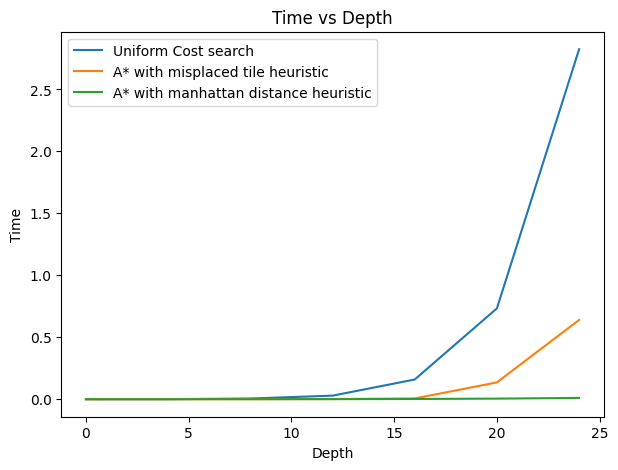

In [16]:
fig, ax=plt.subplots()
time_df.plot(x="depth",y='Uniform Cost search',kind="line", ax=ax,label='Uniform Cost search', figsize=(7,5))
time_df.plot(x="depth",y='A* with misplaced tile heuristic',kind="line", ax=ax,label='A* with misplaced tile heuristic', figsize=(7,5))
time_df.plot(x="depth",y='A* with manhattan distance heuristic',kind="line", ax=ax,label='A* with manhattan distance heuristic', figsize=(7,5))

plt.title('Time vs Depth')
plt.xlabel('Depth')
plt.ylabel('Time')

# Add legend
plt.legend()

# Show plot
plt.show()

### Number of nodes expanded vs Depth

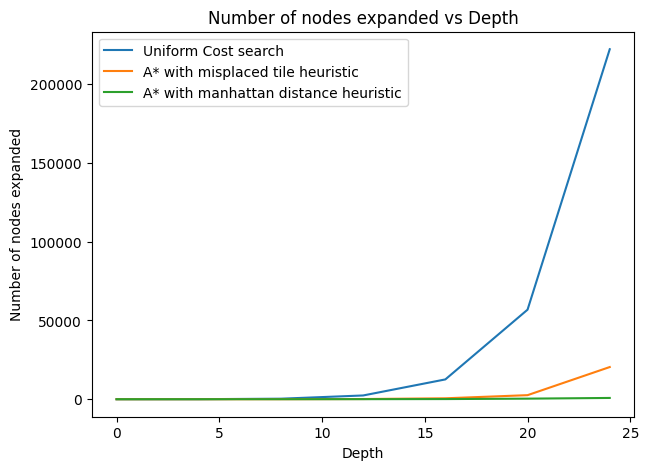

In [17]:
fig, ax=plt.subplots()
nodes_expanded_df.plot(x="depth",y='Uniform Cost search',kind="line", ax=ax,label='Uniform Cost search', figsize=(7,5))
nodes_expanded_df.plot(x="depth",y='A* with misplaced tile heuristic',kind="line", ax=ax,label='A* with misplaced tile heuristic', figsize=(7,5))
nodes_expanded_df.plot(x="depth",y='A* with manhattan distance heuristic',kind="line", ax=ax,label='A* with manhattan distance heuristic', figsize=(7,5))

plt.title('Number of nodes expanded vs Depth')
plt.xlabel('Depth')
plt.ylabel('Number of nodes expanded')

# Add legend
plt.legend()

# Show plot
plt.show()

### Maximum Number of nodes in Queue vs Depth

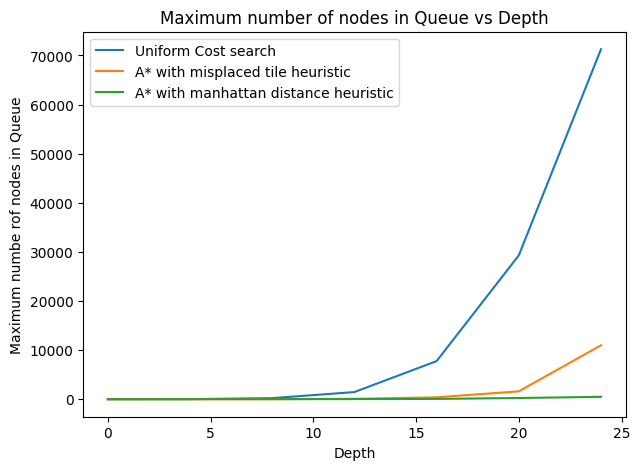

In [18]:
fig, ax=plt.subplots()
max_queue_nodes_df.plot(x="depth",y='Uniform Cost search',kind="line", ax=ax,label='Uniform Cost search', figsize=(7,5))
max_queue_nodes_df.plot(x="depth",y='A* with misplaced tile heuristic',kind="line", ax=ax,label='A* with misplaced tile heuristic', figsize=(7,5))
max_queue_nodes_df.plot(x="depth",y='A* with manhattan distance heuristic',kind="line", ax=ax,label='A* with manhattan distance heuristic', figsize=(7,5))

plt.title('Maximum number of nodes in Queue vs Depth')
plt.xlabel('Depth')
plt.ylabel('Maximum numbe rof nodes in Queue')

# Add legend
plt.legend()

# Show plot
plt.show()